In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['heart.csv', 'Heart_disease_prediction.ipynb', 'Heart_Disease_Prediction_Model.ipynb', 'README.md']


In [3]:
dataset = pd.read_csv("heart.csv")

In [4]:
type(dataset)

pandas.core.frame.DataFrame

In [5]:
dataset.shape

(303, 14)

In [6]:
dataset.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
13,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2,1
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2,1
175,40,1,0,110,167,0,0,114,1,2.0,1,0,3,0


In [8]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# understanding our columns:

In [11]:
info = ["age", "1: male, 0: female", "chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic", "resting blood pressure", " serum cholestoral in mg/dl", "fasting blood sugar > 120 mg/dl",
        "resting electrocardiographic results (values 0,1,2)", " maximum heart rate achieved", "exercise induced angina", "oldpeak = ST depression induced by exercise relative to rest", "the slope of the peak exercise ST segment", "number of major vessels (0-3) colored by flourosopy", "thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]


for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [12]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [13]:
dataset["target"].unique()

array([1, 0], dtype=int64)

In [14]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


## Exploratory Data Analysis (EDA)


target
1    165
0    138
Name: count, dtype: int64


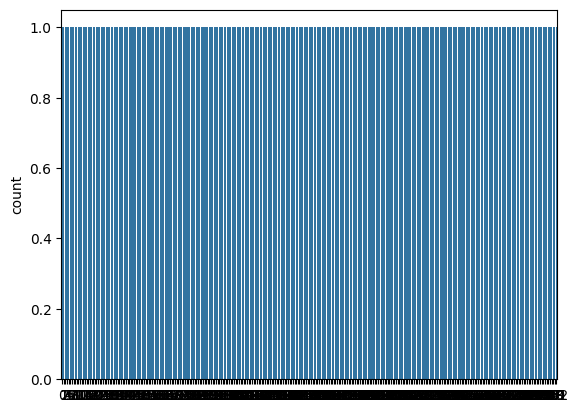

In [15]:
y = dataset["target"]

sns.countplot(y)


target_temp = dataset.target.value_counts()

print(target_temp)

In [16]:
print("Percentage of patience without heart problems: " +
      str(round(target_temp[0]*100/303, 2)))
print("Percentage of patience with heart problems: " +
      str(round(target_temp[1]*100/303, 2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


In [17]:
# We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

In [18]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

In [19]:
# Analysing the chest pain
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

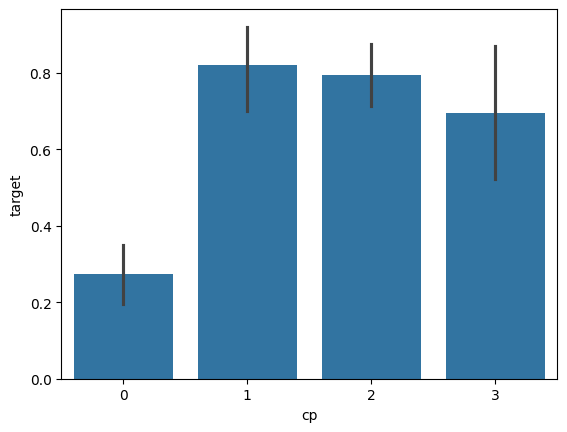

In [20]:
sns.barplot(x="cp", y="target", data=dataset)
plt.show()

In [21]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [22]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

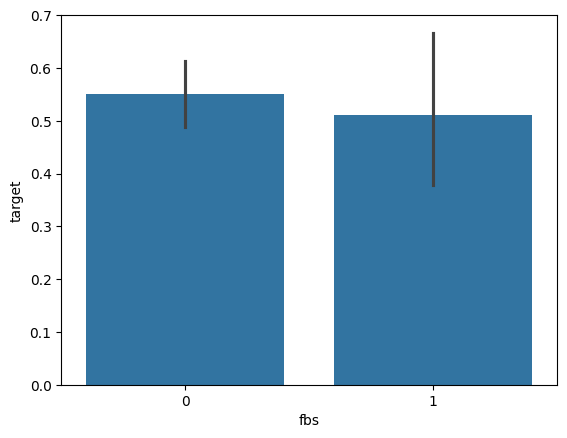

In [23]:
sns.barplot(x=dataset["fbs"], y="target", data=dataset)
plt.show()

In [24]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

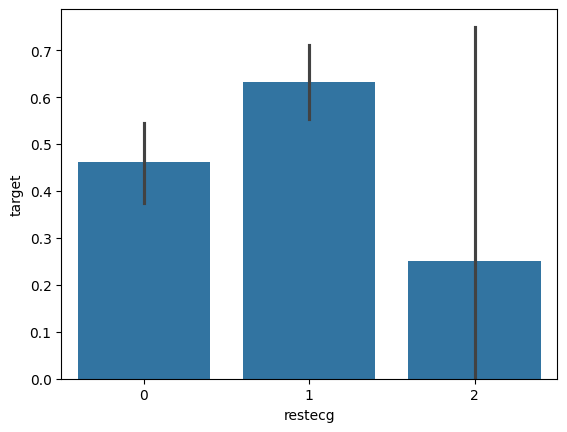

In [25]:
sns.barplot(x=dataset["restecg"], y="target", data=dataset)
plt.show()

In [26]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

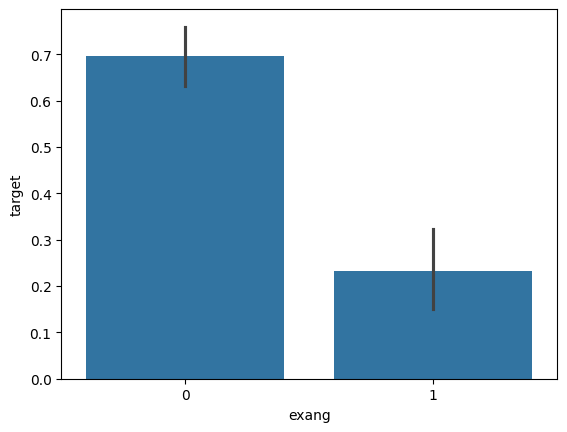

In [27]:

sns.barplot(x=dataset["exang"], y="target", data=dataset)
plt.show()

<Axes: xlabel='thal', ylabel='Density'>

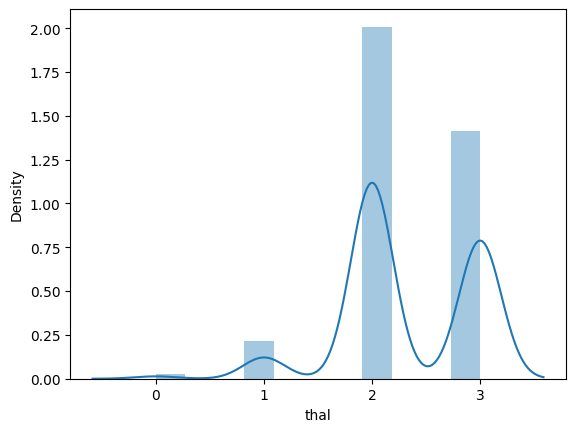

In [28]:
sns.distplot(dataset["thal"])

## Train Test split


In [29]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target", axis=1)
target = dataset["target"]

X_train, X_test, Y_train, Y_test = train_test_split(
    predictors, target, test_size=0.20, random_state=0)

In [30]:
X_train.shape

(242, 13)

In [31]:
X_test.shape

(61, 13)

In [32]:
Y_train.shape

(242,)

In [33]:
Y_test.shape

(61,)

## Model Fitting


In [34]:
from sklearn.metrics import accuracy_score

### Logistic Regression


In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, Y_train)

Y_pred_lr = lr.predict(X_test)

In [36]:
Y_pred_lr.shape

(61,)

In [37]:
score_lr = round(accuracy_score(Y_pred_lr, Y_test)*100, 2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %


### Naive Bayes


In [38]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train, Y_train)

Y_pred_nb = nb.predict(X_test)

In [39]:
Y_pred_nb.shape

(61,)

In [40]:
score_nb = round(accuracy_score(Y_pred_nb, Y_test)*100, 2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 85.25 %


## SVM


In [41]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [42]:
Y_pred_svm.shape

(61,)

In [43]:
score_svm = round(accuracy_score(Y_pred_svm, Y_test)*100, 2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 81.97 %


## RANDOM FOREST


In [44]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train, Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf, Y_test)*100, 2)
    if (current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

# print(max_accuracy)
# print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)

In [45]:
score_rf = round(accuracy_score(Y_pred_rf, Y_test)*100, 2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 90.16 %


## XGBoost


In [46]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [47]:
Y_pred_xgb.shape

(61,)

In [48]:
score_xgb = round(accuracy_score(Y_pred_xgb, Y_test)*100, 2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 83.61 %


In [49]:
scores = [score_lr, score_nb, score_svm, score_rf, score_xgb]
algorithms = ["Logistic Regression", "Naive Bayes",
              "Support Vector Machine", "Random Forest", "XGBoost"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using " +
          algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 85.25 %
The accuracy score achieved using Naive Bayes is: 85.25 %
The accuracy score achieved using Support Vector Machine is: 81.97 %
The accuracy score achieved using Random Forest is: 90.16 %
The accuracy score achieved using XGBoost is: 83.61 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

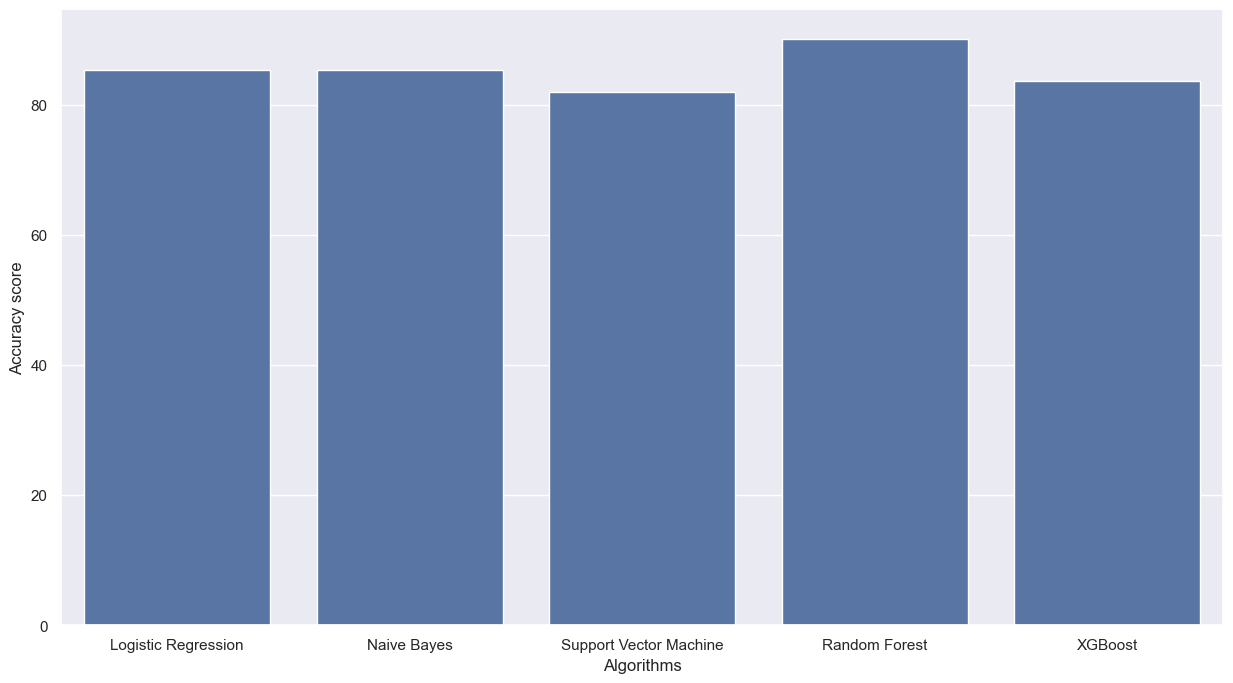

In [50]:
sns.set(rc={'figure.figsize': (15, 8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms, y=scores)

In [51]:
import joblib

# Assuming your trained model is called `rf_model`
joblib.dump(rf, "heart_disease_rf_model.pkl")

print("✅ Model saved as heart_disease_rf_model.pkl")


✅ Model saved as heart_disease_rf_model.pkl
